In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [60]:
salary=pd.read_csv("D:\dinesh document\EXCELR\Data Science\Assingment\Simple linear Regression\Salary_Data.csv")

## EDA

In [61]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [62]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [64]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [65]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Visualization

In [66]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [67]:
X,Y=salary['YearsExperience'],salary['Salary']

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

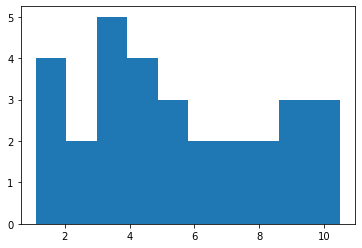

In [68]:
# Histogram of Yearsexperience
plt.hist(X)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

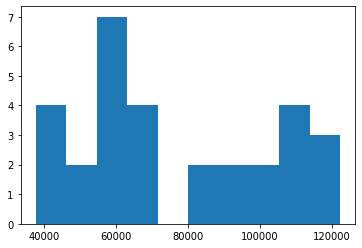

In [69]:
# Histogram of salary
plt.hist(Y)

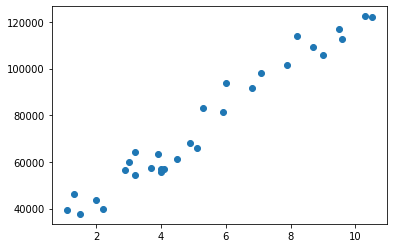

In [70]:
# Scatter plot of yearsexperience and salary
plt.scatter(X,Y)
plt.show()


In [71]:
lr=LinearRegression()

In [72]:
X,Y=salary[['YearsExperience']],salary['Salary']

In [73]:
lr.fit(X,Y)

LinearRegression()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

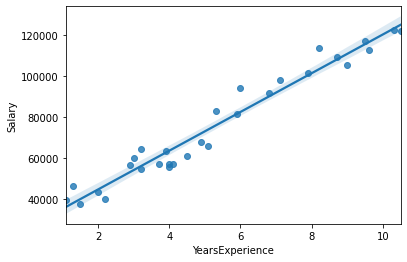

In [74]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

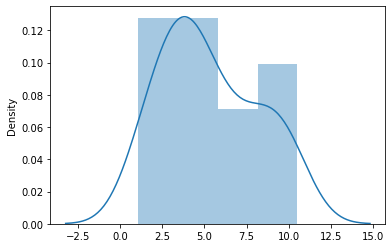

In [75]:
sns.distplot(X)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

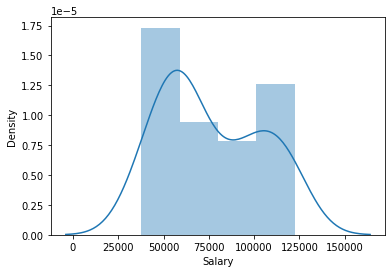

In [76]:
sns.distplot(Y)

<AxesSubplot:>

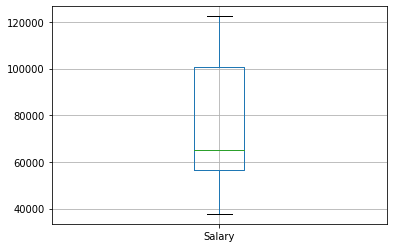

In [77]:
salary[['Salary']].boxplot()

<AxesSubplot:>

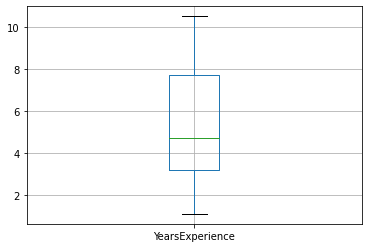

In [78]:
salary[['YearsExperience']].boxplot()

#### 1.There are no outlier in the data.
#### 2. There is possitive correletion between YearsExperience and  Salary.

### Model_Training

In [79]:
model=ols('Salary~YearsExperience',data=salary).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        13:45:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [82]:
pred1=model.predict(X)
print(pred1)
print(Y)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    1055

In [83]:
pred1.corr(salary.Salary)

0.9782416184887601

Text(0.5, 1.0, 'residual Plot')

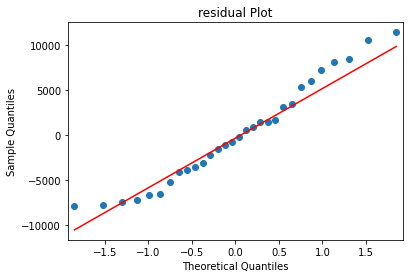

In [84]:
# QQplot
sm.qqplot(model.resid,line='q')
plt.title("residual Plot")

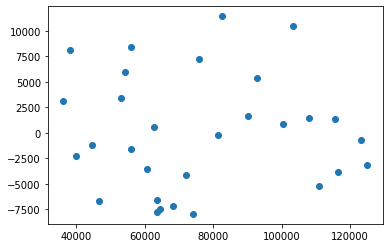

In [85]:
# Residual plot for homodscedasticity
plt.scatter(model.fittedvalues,model.resid)
plt.show()

In [86]:
# Cook distance
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [87]:
c

array([2.04861819e-02, 1.25145650e-01, 8.72116606e-03, 1.93092472e-03,
       5.84154210e-02, 1.16363588e-02, 3.40167284e-02, 2.19613539e-03,
       6.17099555e-02, 9.25533214e-03, 2.21968428e-04, 4.01548032e-02,
       2.90705910e-02, 3.56540638e-02, 3.01682374e-02, 9.42447229e-03,
       3.39239364e-02, 2.76816818e-02, 1.88727425e-05, 7.43028573e-02,
       1.98157219e-03, 2.24043716e-02, 7.68659258e-04, 1.31754523e-01,
       2.96376458e-03, 4.57869868e-02, 4.00003185e-03, 3.18614898e-02,
       1.52660429e-03, 3.02325174e-02])

In [88]:
c.argmax()

23

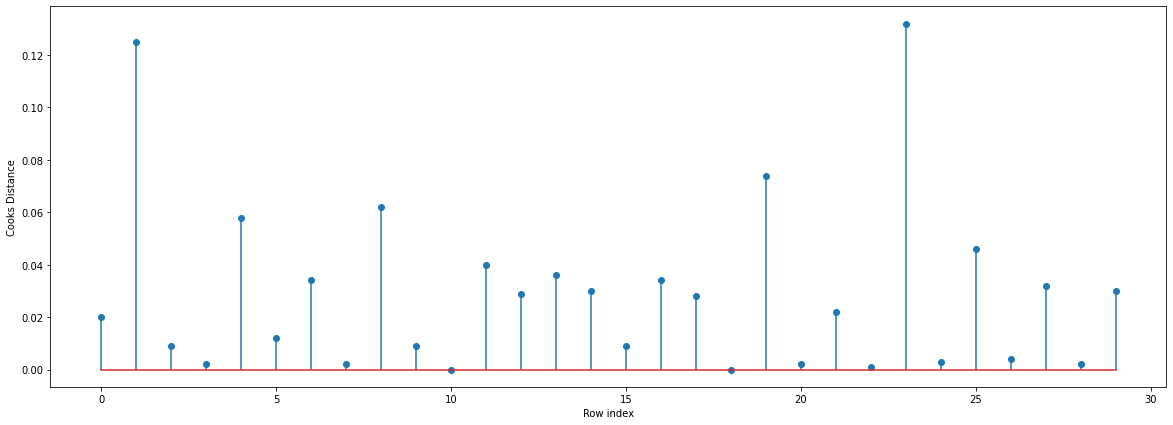

In [89]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(salary)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [90]:
# High influence points
k = salary.shape[1]
n = salary.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

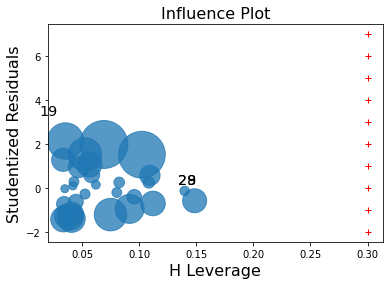

In [91]:
influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [92]:
salary.drop([1,23],inplace=True)

In [94]:
new_model=ols('Salary~YearsExperience',data=salary).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     650.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           6.32e-20
Time:                        13:47:38   Log-Likelihood:                -279.15
No. Observations:                  28   AIC:                             562.3
Df Residuals:                      26   BIC:                             565.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.505e+04   2230.710     11.229      0.000    2.05e+04    2.96e+04
YearsExperience  9464.1854    371.128     25.501      0.000    8701.320    1.02e+04
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.290
Skew:                           0.445   Prob(JB):                        0.525
Kurtosis:                       2.439   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

In [31]:
log_salary=np.log(salary['Salary'])

<AxesSubplot:>

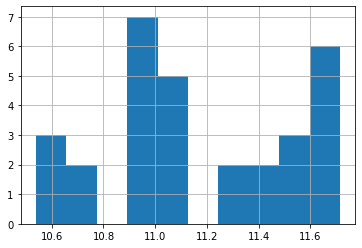

In [35]:
log_salary.hist()

In [32]:
model2 = ols('log_salary~YearsExperience',data=salary).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        13:09:16   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
pred2=model2.predict(X)
pred2

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [98]:
pred2.corr(salary.Salary)

0.9805895660690339

Text(0.5, 1.0, 'residual Plot')

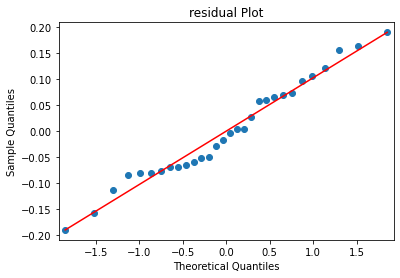

In [99]:
# QQplot
sm.qqplot(model2.resid,line='q')
plt.title("residual Plot")

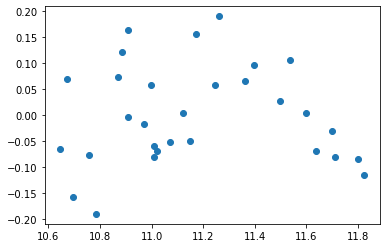

In [100]:
# Residual plot for homodscedasticity
plt.scatter(model2.fittedvalues,model2.resid)
plt.show()

## SQ transformation

In [104]:
salary_sq=salary.Salary*salary.Salary
salary_sq

0     1.547872e+09
2     1.423628e+09
3     1.894426e+09
4     1.591292e+09
5     3.208316e+09
6     3.618022e+09
7     2.964258e+09
8     4.153158e+09
9     3.270582e+09
10    3.996516e+09
11    3.112970e+09
12    3.244100e+09
13    3.258241e+09
14    3.734554e+09
15    4.615572e+09
16    4.359829e+09
17    6.903616e+09
18    6.619938e+09
19    8.824724e+09
20    8.415861e+09
21    9.657583e+09
22    1.026210e+10
24    1.197514e+10
25    1.114756e+10
26    1.368175e+10
27    1.268664e+10
28    1.497956e+10
29    1.485278e+10
Name: Salary, dtype: float64

<AxesSubplot:>

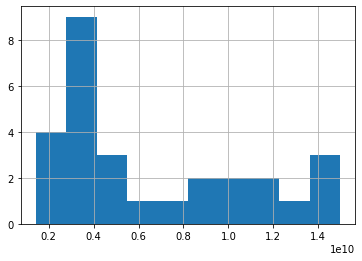

In [105]:
salary_sq.hist()

In [106]:
model3=ols('salary_sq~YearsExperience',data=salary).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_sq   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     562.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.87e-19
Time:                        14:04:45   Log-Likelihood:                -617.06
No. Observations:                  28   AIC:                             1238.
Df Residuals:                      26   BIC:                             1241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.779e+09   3.89e+08     -4.579      0.000   -2.58e+09    -9.8e+08
YearsExperience  1.533e+09   6.46e+07     23.715      0.000     1.4e+09    1.67e+09
==============================================================================
Omnibus:                        2.943   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.416
Skew:                          -0.154   Prob(JB):                        0.493
Kurtosis:                       1.942   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
pred3=model3.predict(X)
pred3

0    -9.273724e+07
1     2.138912e+08
2     5.205196e+08
3     1.287091e+09
4     1.593719e+09
5     2.666919e+09
6     2.820233e+09
7     3.126861e+09
8     3.126861e+09
9     3.893432e+09
10    4.200061e+09
11    4.353375e+09
12    4.353375e+09
13    4.506689e+09
14    5.119946e+09
15    5.733203e+09
16    6.039831e+09
17    6.346460e+09
18    7.266345e+09
19    7.419659e+09
20    8.646173e+09
21    9.106116e+09
22    1.033263e+10
23    1.079257e+10
24    1.155914e+10
25    1.201909e+10
26    1.278566e+10
27    1.293897e+10
28    1.401217e+10
29    1.431880e+10
dtype: float64

In [112]:
pred3.corr(salary.Salary)

0.9805895660690338

Text(0.5, 1.0, 'residual Plot')

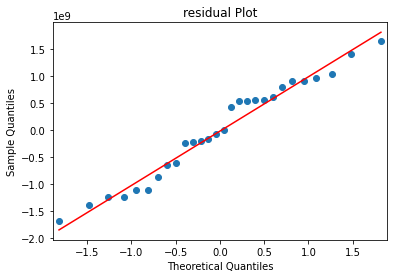

In [113]:
# QQplot
sm.qqplot(model3.resid,line='q')
plt.title("residual Plot")

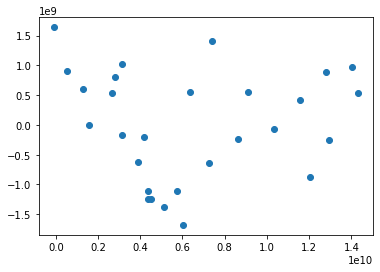

In [116]:
# Residual plot for homodscedasticity
plt.scatter(model3.fittedvalues,model3.resid)
plt.show()

## SQRT transformation

In [118]:
salary_sqrt=np.sqrt(salary.Salary)

<AxesSubplot:>

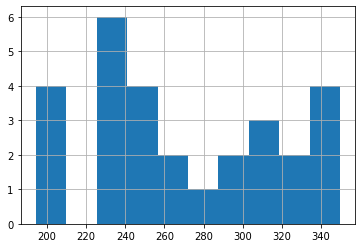

In [119]:
salary_sqrt.hist()

In [121]:
model4=ols('salary_sqrt~YearsExperience',data=salary).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_sqrt   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     505.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.46e-18
Time:                        14:13:44   Log-Likelihood:                -105.77
No. Observations:                  28   AIC:                             215.5
Df Residuals:                      26   BIC:                             218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         179.6393      4.562     39.382      0.000     170.263     189.016
YearsExperience    17.0621      0.759     22.482      0.000      15.502      18.622
==============================================================================
Omnibus:                        2.336   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.065
Skew:                           0.618   Prob(JB):                        0.356
Kurtosis:                       2.509   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
pred4=model4.predict(X)
print(pred4)
print(Y)

0     198.407590
1     201.820002
2     205.232414
3     213.763445
4     217.175857
5     229.119300
6     230.825507
7     234.237919
8     234.237919
9     242.768949
10    246.181362
11    247.887568
12    247.887568
13    249.593774
14    256.418599
15    263.243423
16    266.655835
17    270.068248
18    280.305484
19    282.011691
20    295.661340
21    300.779958
22    314.429607
23    319.548226
24    328.079256
25    333.197875
26    341.728905
27    343.435112
28    355.378554
29    358.790967
dtype: float64
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: floa

In [123]:
pred4.corr(salary.Salary)

0.9805895660690339

Text(0.5, 1.0, 'residual Plot')

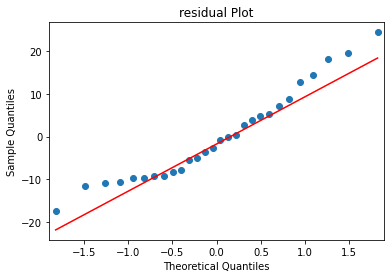

In [124]:
# QQplot
sm.qqplot(model4.resid,line='q')
plt.title("residual Plot")

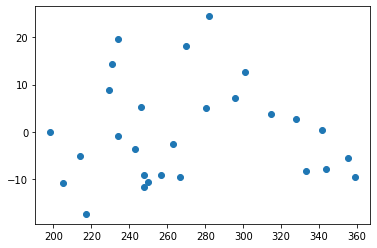

In [126]:
# Residual plot for homodscedasticity
plt.scatter(model4.fittedvalues,model4.resid)
plt.show()

#### Model without transformation givinig highest R-squared. Hence we can use model without transformation for prediction.